In [1]:
pip install transformers

In [2]:
!pip install transformers
!pip install torch
!pip install pillow


In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

In [4]:
# Load the processor and the model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
!pip install matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import re

In [6]:
# Function to resize an image to 384x384 pixels
def resize_image_to_384(image):
    size = (224, 224)
    resized_image = image.resize(size, Image.ANTIALIAS)
    return resized_image

In [7]:
def extract_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format

    # Resize the image
    resized_image = resize_image_to_384(image)

    # Display the resized image using Matplotlib
    plt.imshow(resized_image)
    plt.title('Resized Image')
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the resized image and prepare it for the model
    pixel_values = processor(images=resized_image, return_tensors="pt").pixel_values

    # Generate the output text
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

In [8]:


def extract_total(text):
    # Pattern to find amount between # symbols and following DH or D.H or B.P.DH
    total_pattern = r'(?:D\.H|DH|B\.P\.DH)[^#]*#([\d,.]+)#'
    match = re.search(total_pattern, text, re.IGNORECASE)

    if match:
        amount = match.group(1).strip().replace(',', '').replace(' ', '')
        return amount
    return 'Not Found'
def extract_date(text):
    # Pattern to match Moroccan date formats after "Le"
    date_patterns = [
        r'Le\s+(\d{1,2}/\d{1,2}/\d{4})',  # Le dd/mm/yyyy
        r'Le\s+(\d{1,2}-\d{1,2}-\d{4})'   # Le dd-mm-yyyy
    ]
    for pattern in date_patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            return match.group(1)
    return 'Not Found'


In [9]:
def process_check(image_path):
    # Extract text from resized image (right side)
    extracted_text = extract_text_from_image(image_path)

    # Extract date and total amount from the text
    date = extract_date(extracted_text)
    total_amount = extract_total(extracted_text)

    print(f'Date: {date}')
    print(f'Total Amount: {total_amount}')


<ipython-input-6-4ed8d4a59b76>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


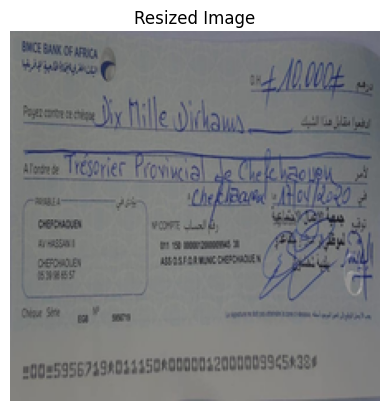

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Date: Not Found
Total Amount: Not Found


In [10]:
image_path = '/content/drive/MyDrive/Data/BMCE.jpg'
process_check(image_path)



Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-11-d866549c1879>:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


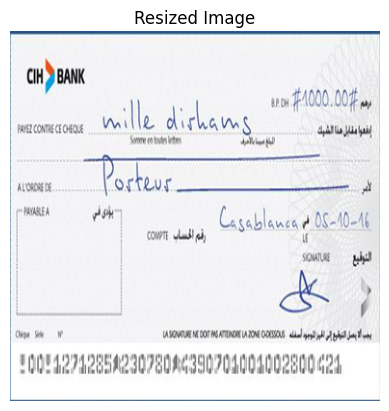

Extracted Text: 1903


In [11]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

# Load the processor and the model
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

# Function to resize an image to 384x384 pixels
def resize_image_to_384(image):
    size = (384, 384)
    resized_image = image.resize(size, Image.ANTIALIAS)
    return resized_image

# Function to extract text from an image
def extract_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format

    # Resize the image
    resized_image = resize_image_to_384(image)

    # Display the resized image using Matplotlib
    plt.imshow(resized_image)
    plt.title('Resized Image')
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the resized image and prepare it for the model
    pixel_values = processor(images=resized_image, return_tensors="pt").pixel_values

    # Generate the output text
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

# Example usage
image_path = '/content/drive/MyDrive/Data/CIH .png'
extracted_text = extract_text_from_image(image_path)
print('Extracted Text:', extracted_text)


<ipython-input-14-eba21e921c86>:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_image = image.resize(size, Image.ANTIALIAS)


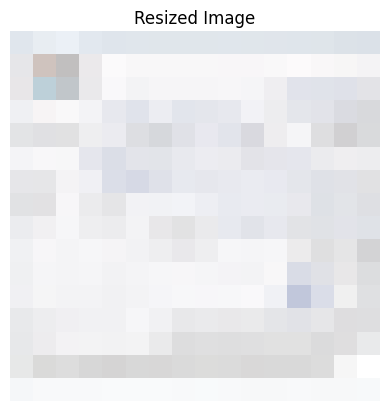

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Extracted Text: '


In [14]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt


# Function to resize an image to 384x384 pixels
def resize_image_to_16(image):
    size = (16, 16)
    resized_image = image.resize(size, Image.ANTIALIAS)
    return resized_image

# Function to extract text from an image
def extract_text_from_image(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format

    # Resize the image
    resized_image = resize_image_to_16(image)

    # Display the resized image using Matplotlib
    plt.imshow(resized_image)
    plt.title('Resized Image')
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the resized image and prepare it for the model
    pixel_values = processor(images=resized_image, return_tensors="pt").pixel_values

    # Generate the output text
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    return generated_text

# Example usage
image_path = '/content/drive/MyDrive/Data/CIH .png'
extracted_text = extract_text_from_image(image_path)
print('Extracted Text:', extracted_text)
